In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp, e
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile, loadmat               
from IPython.display import Video, Audio



%matplotlib inline

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Quantization

* **Course AIS2201 - Signal Processing**
* **Uke 36/37, 2025**
* **Lecturer: Kai Erik Hoff**



## Topics

* Recap sampling
* What is Quantization
* Signal noise & quantization noise

# Ideal sampling

* Samples of the analog signal $x(t)$ are taken without error at the precise moment $t=n\cdot T_s$.

<img src="figures/ideal_sampling.svg" style="width: 60%; margin-left: 100px">
     


# Analog-to-Digital Converters

* Confined to a specific voltage range $v \in [v_{\text{min}}, v_{\text{max}}]$
    * Microcontrollers are typically unipolar, with a range $v \in [0\text{V}, v_{\text{ref}}]$.
        * Some typical values for $v_{\text{ref}}$: $5\text{V}$, $3.3\text{V}$

* Output is an **integer value** with a specific number of **bits**
    * Arduino typically ADC has 10 bits resolution
    * STM32 ADC has 12 bits resolution

# Quantization
<img src="figures/Fig3_Quantization.png" style="width: 60%; margin-left: 100px" />

# Quantization step

* An A/D converter may only sample with finite precision
    * Limited number of discrete voltage levels available to measure
* The distance between each discrete voltage level is the *quantization step size* $q$:
$$\large q = \frac{v_{\text{max}} - v_{\text{min}}}{2^b}$$
where $b$ is the *bit-depth* of the A/D Converter

<img src="figures/quantization_staircase.png" style="width: 50%; margin-left: 100px">


## Example:
- An Arduino has a built-in ADC with $10$ bit resolution
- The ADC operates in the voltage range $v \in [0\text{V}, 5\text{V}]$ 
- What is the quantization step size $q$?

- Smallest observable change in voltage:
$$ q = \frac{5V}{2^{10}} = \frac{5V}{1024} \approx 4.89mV$$

# Quantization Error

* Rounding to the closest available quantization step implies an upper bound for quantization error:
$$\large \max\left(e_q(t_n)\right) = \frac{q}{2}$$

* The sampling operation can be modeled as an ideal A/D converter followed by a noise source


<img src="figures/quantization_model.svg" style="width: 50%; margin-left: 100px" />

## Quantization in Audio

In [13]:
noise = np.random.randn(len(xn))*0.01

In [14]:
from scipy.io import wavfile
fs, data = wavfile.read("../data/Ecstacy_of_gold_intro.wav")
xn = data/np.max(np.abs(data))
n_bits = 16 # Number of bits used to represent samples

shift = 16 - n_bits # Number of LSB bits to cut
data = data >> shift # Employ bitwise right shift


Audio(xn[:,0].flatten()+noise, rate=fs) 

# Noise




* ***All*** signals will contain a degree of noise in addition to the desired signal
$$\text{measured signal} = \text{desired signal} + \text{noise}$$

* Signal noise sources are modeled as a [stochastic process](https://en.wikipedia.org/wiki/Stochastic_process)


* White noise occurs often in signal processing
    * Each sample of a noise source $x_n[n]$ is **completely random**
    * Noise properties described by a **probability density function**

## Gaussian white noise:
$$\Large x_n[n] \sim \mathcal{N}(\mu=0, \sigma^2=P_q)$$

<img src="figures/Standard_deviation_diagram_micro.svg" style="width: 40%; margin-left: 100px" />

## Uniform white noise:
$$\Large x_n[n] \sim \mathcal{U}(a, b)$$
<img src="figures/Uniform_Distribution_PDF_SVG.svg" style="width: 40%; margin-left: 100px" />

# Noise in the Frequency Domain

* While the value of a white noise source $x_n[n]$ is completely random for any given sample number $n$, the spectral content can still be estimated.

* "White" noise has a flat frequency spectrum *on average*, hence the name.

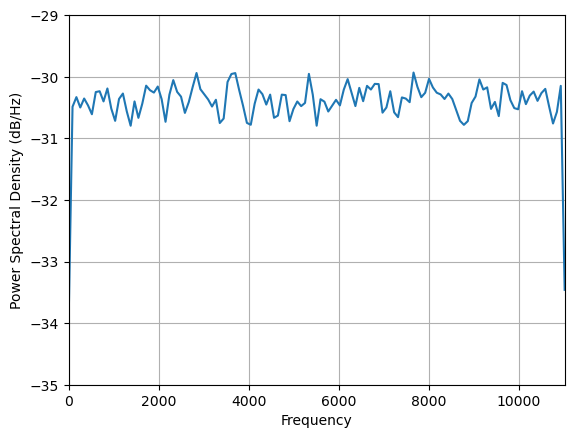

In [15]:
P_e = 10 # Noise Power. Assume unit is Watts...

fs = 22_050

noise = np.random.randn(100000)*np.sqrt(P_e)


plt.psd(noise, Fs=22050);
plt.xlim([0, fs/2]);
plt.show()

Audio(noise, rate=fs)

#### Notes

If we integrate the entire power spectrum curve above, the result will be exactly $10$, or the total signal power $P_e$ used when generating the noise.

# Spectral analysis of noisy signals





* ***All*** signals will contain a degree of noise in addition to the desired signal
$$\text{measured signal} = \text{desired signal} + \text{noise}$$

* White noise is commonly encountered.
    * The amplitude value of the noise at any given time $t$ is *completely* random.

* Noise properties are less challenging to identify in the frequency domain

# Signal-to-noise ratio

* A measure (in $\text{dB}$) of total signal power relative to noise power.
$$\text{SNR}_{dB} = 10 \cdot \log\left(\frac{P_{\text{signal}}}{P_{\text{noise}}}\right)$$
    * Indicates "quality" of a signal. 

* Assuming white noise, signal quality (SNR) may be measured using spectral analysis.
    * How much does the signal's spectral content protrude above the "noise floor"?

# Spectral content of white noise




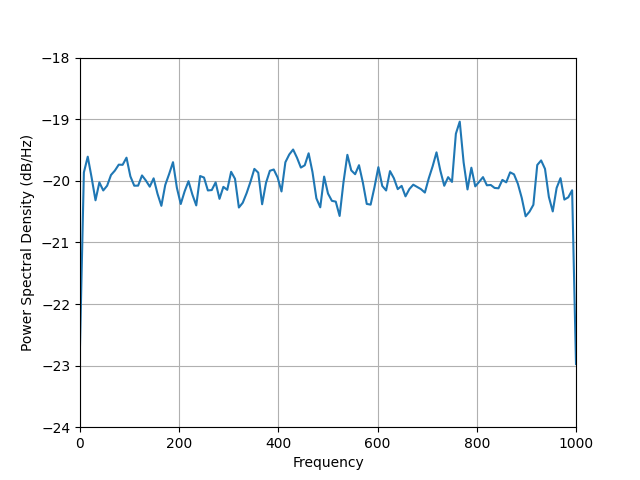

In [16]:
P_q = 10 # Noise Power. Assume unit is Watts...

noise = np.random.randn(100000)*np.sqrt(P_q)

plt.close(2); plt.figure(2)
plt.psd(noise, Fs=2000);
plt.xlim([0, 1000]);

# Time-domain view of a noisy signal


Text(0.5, 0, 'time $t$')

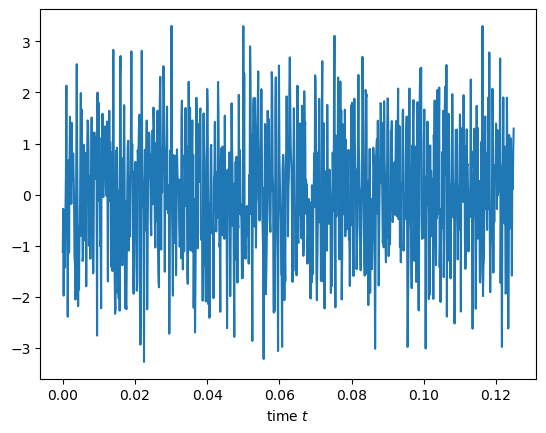

In [16]:
noise = np.random.randn(1000)
t = np.linspace(0, 1/8, 1000, endpoint=False)
signal = cos(2*pi*1000*t)

plt.close(3); plt.figure(3)
plt.plot(t, noise+signal);
plt.xlabel("time $t$")

* Close to impossible to make out the signal

# Spectral content of a noisy signal


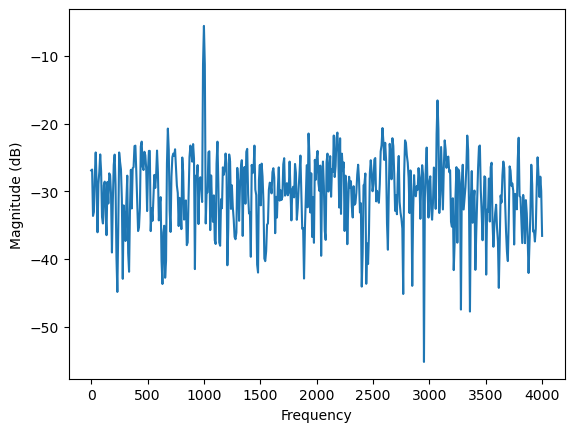

In [17]:
noise = np.random.randn(1000)
t = np.linspace(0, 1/8, 1000, endpoint=False)
signal = cos(2*pi*1000*t)

plt.close(4); plt.figure(4)
plt.magnitude_spectrum(noise+signal,scale="dB",Fs=8000);
plt.show()

* Spectral analysis of real-world signals will typically reveal a "noise-floor" resulting from white background noise.
    * The weaker the background noise, the lower this noise floor will be.
* Picking out the signal from background noise is much easier, as it in the example is raised from the "noise floor" by approx $20 \text{ dB}$.

## Estimating SNR using spectral analysis
<img src="figures/sig_noise.png" style="width: 60%; margin-left: 100px" />

# Quantization Noise

* Quantization error is modeled as uniformly distributed noise

$$e_q[n] \sim \mathcal{U}\left( -\frac{q}{2}, \frac{q}{2} \right)$$

* Quantization error has noise power determined by $q$:
$$ P_q = \frac{q^2}{12}$$

## Example:
* Calculate the SNR when sampling a sinusoid with $1\text{V}$ magnitude on an Arduino with $v_{\text{ref}}=5\text{V}$ and $10$ bits resolution.

## Code demo

In [19]:
from ipywidgets import interact, IntSlider

V_p = 20

# Hypothetical signal
def x(t): 
    B1 = V_p #Hz
    t_0 = (t[-1]-t[0])/9*4
    s = (t[-1]-t[0])*B1*np.sinc(B1*(t-t_0))*(0.5-0.5*np.cos(2*np.pi*np.arange(len(t))/len(t)))*np.cos(2*pi*100*t)
    return s

def quantize(e: list[float], q: float):
    return np.round(e/q)*q

@interact(bits = IntSlider(min=1, max=12, step=1, value=8))
def quantized_spectrum(bits):

    q = 2*V_p/(2**bits)
    fs = 500
    T = 1
    t_k = np.linspace(0, T, fs*T)
    sigma_q = q**2/12
    
    e_k = quantize(x(t_k), q=q)
    
    plt.magnitude_spectrum(e_k, Fs=fs, scale="dB");
    plt.title("$\\text{SNR} = %.2f \\text{dB}$"%(10*np.log10(V_p/sigma_q)))
    plt.ylim([-100, 1])
    plt.show()

interactive(children=(IntSlider(value=8, description='bits', max=12, min=1), Output()), _dom_classes=('widget-…

# Key Points



* Each additional bit of resolution in an ADC will:
    1. Cut the quantization step size $q$ in half
    2. Increase SNR by $6\text{ dB}$

* It is desirable to make sure the input signal $x(t)$ utilizes the the ADC operating voltage to a satisfactory degree.
    * There is a tradeoff:
        - Too Weak input signal $\rightarrow$ low SNR
        - Suitably calibrated input signal $\rightarrow$ high SNR
        - Too Strong input signal $\rightarrow$ low SNR due to clipping

* Pay attention to the input signal mean
    * A DC offset significantly removed from the midpoint of the operating voltage range increases the chance of clipping

* Biasing and amplification can be performed by means of [biasing and decoupling op-amps](https://www.analog.com/en/resources/app-notes/an-581.html) (outside the scope of this course).